In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import os

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
%matplotlib inline

/apps/miniconda/envs/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

### Input Image Dimensions

In [3]:
img_rows, img_cols = 28, 28

### Loading Data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

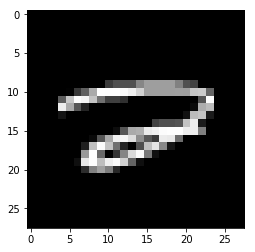

In [5]:
plt.imshow(x_train[np.random.choice(60000)],cmap='gray')

In [6]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

### Try the following data preprocessing and report a. performance change, b. speed of convergence and c. changing color channel such as stacking grayscale channels to produce RGB like image.

####    1. Normalizing the data
####    2. stack to create 3 channel RGB images
####    3. adding random noise to the images

### Converting Image from int value to float

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Converting class vectors to categorical class matrices

In [8]:
y_train[1]

0

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])



### Designing a model is very complex. There are still a lot of parameters that require human intervention. Please experiment with many variations of the following model. Some variations may include:
####    1. Widening the network (more filters per layer)
####    2. Making the network deeper (more layers)
####    3. As the network gets bigger (in width or depth), overfitting is most likely to occur. Use Regularizations such as dropout, L1 or L2 regularizations on layer weights (https://keras.io/layers/core/#activityregularization).
####    4. Try a resnet style architecture (https://github.com/fchollet/deep-learning-models/blob/master/resnet50.py) or implement only the model from a recent paper of your choice that deals with mnist dataset.
    

### For all these variations, save a snapshot of the network figure and report changes in performance, training process and finally the situations, if any, where the model is overfitting and how you solved it.

### Define a model

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

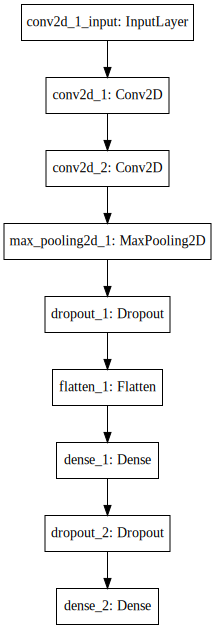

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## Please other optimizers as well: https://keras.io/optimizers/

### Compiling model

In [14]:
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0001, nesterov=False)

model.compile(loss=['categorical_crossentropy'],
              optimizer=sgd,
              metrics=['accuracy'])

### Model training

In [ ]:
os.system('rm -rf Graph')
visualize = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1,  
          write_graph=True, write_images=True)
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[visualize])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 192us/step - loss: 0.4905 - acc: 0.8452 - val_loss: 0.1333 - val_acc: 0.9607
Epoch 2/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.1803 - acc: 0.9463 - val_loss: 0.0750 - val_acc: 0.9757
Epoch 3/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.1266 - acc: 0.9625 - val_loss: 0.0628 - val_acc: 0.9795
Epoch 4/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.1016 - acc: 0.9699 - val_loss: 0.0508 - val_acc: 0.9832
Epoch 5/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.0856 - acc: 0.9743 - val_loss: 0.0454 - val_acc: 0.9856
Epoch 6/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0791 - acc: 0.9766 - val_loss: 0.0406 - val_acc: 0.9874
Epoch 7/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.0694 - acc: 0.9790 - val_loss: 0.

### Model testing

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
img = x_test[np.random.choice(10000)]
pred = model.predict(np.expand_dims(img,axis=0))
print('network output: \n {}\n'.format(pred))
print('prediction: {}'.format(np.argmax(pred,axis=1)))
print('\n'*3)
plt.imshow(img[:,:,0],cmap='gray')